In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/raw/data.csv")

# Display first 5 rows
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [3]:
# Check dataset shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Check column names and data types
print("\nData types:")
print(df.dtypes)

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Dataset shape: (95662, 16)

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Number of duplicate rows: 0


In [4]:
# Numerical features summary
print("\nSummary statistics for numerical features:")
print(df.describe())

# Categorical features summary
print("\nSummary for categorical features:")
print(df.describe(include=['object']))


Summary statistics for numerical features:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Summary for categorical features:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  Batc

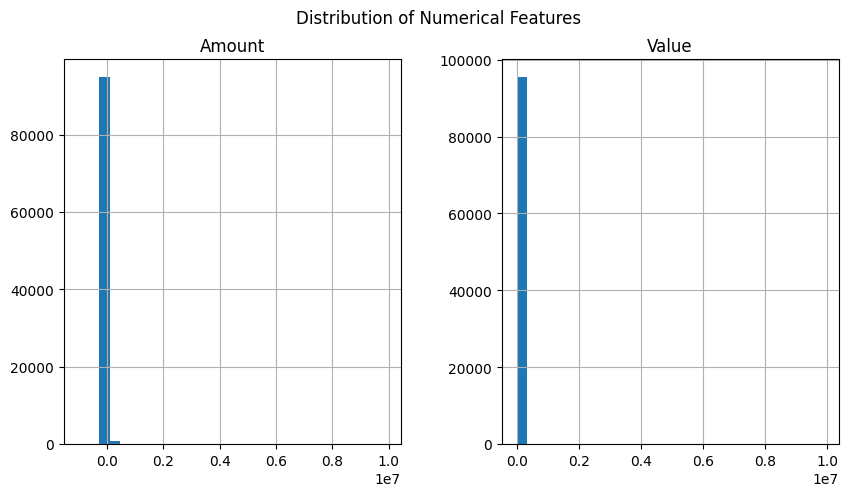


Skewness:
Amount    51.098490
Value     51.291086
dtype: float64


In [5]:
# Plot histograms for numerical columns
numerical_cols = ['Amount', 'Value']
df[numerical_cols].hist(bins=30, figsize=(10, 5))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Check skewness
print("\nSkewness:")
print(df[numerical_cols].skew())

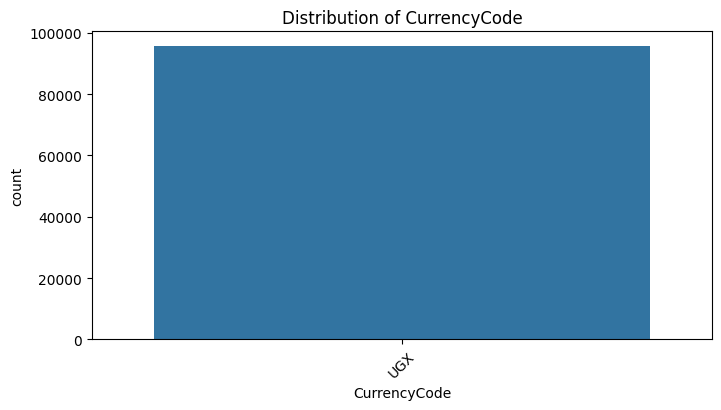

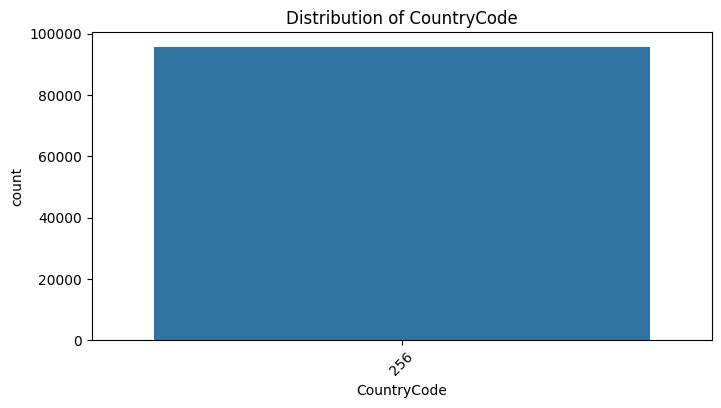

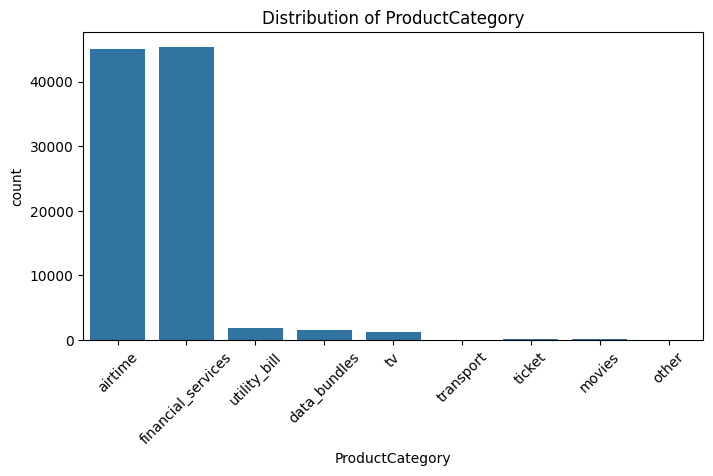

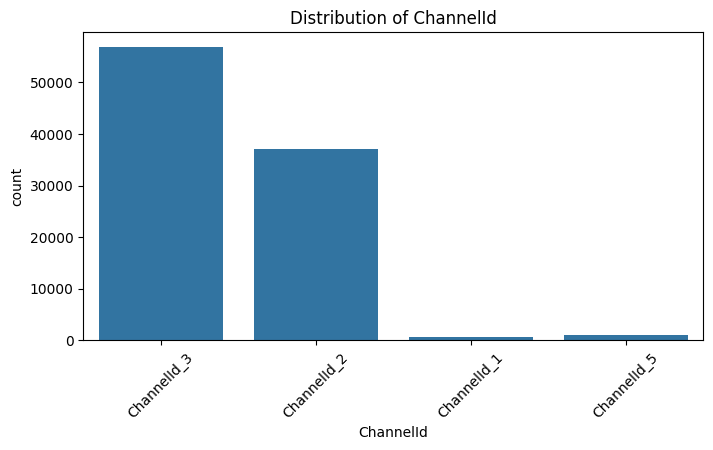

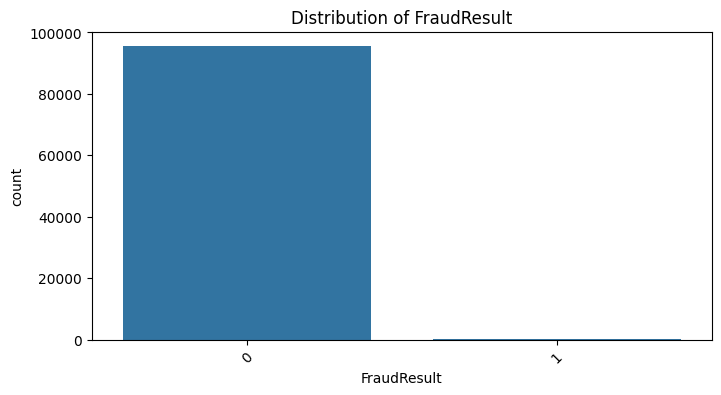

In [6]:
# Plot bar charts for categorical columns
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'FraudResult']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

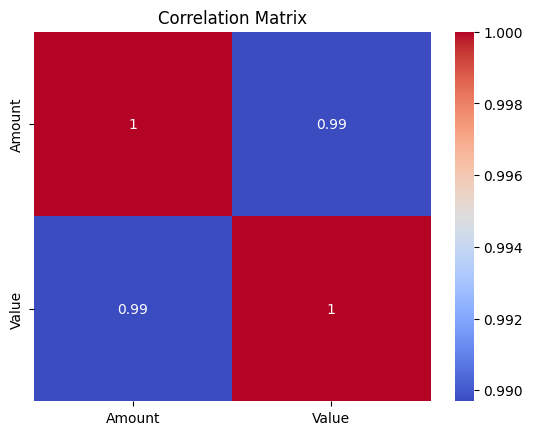

In [7]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Missing values per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


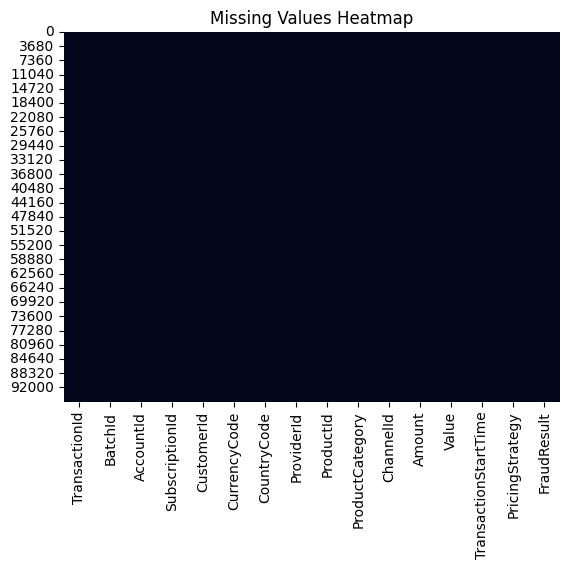

In [8]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

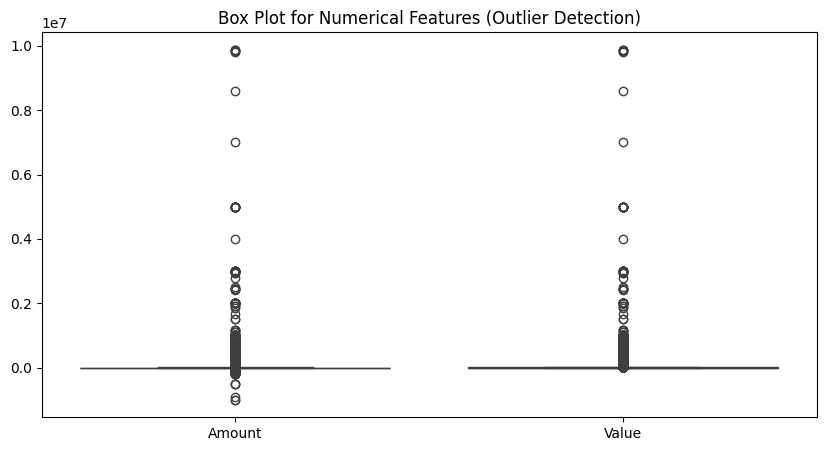

In [9]:
# Box plots for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot for Numerical Features (Outlier Detection)")
plt.show()